In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

### CHAPTER 02 머신러닝 실습(분류)

##### 1. 데이터 불러오기

In [ ]:
# 데이터 불러오기
train = pd.read_csv("/content/drive/MyDrive/빅데이터분석기사파일/part2/ch2/train.csv")
test = pd.read_csv("/content/drive/MyDrive/빅데이터분석기사파일/part2/ch2/test.csv")

##### 2. EDA

In [ ]:
train.head(3)

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,3331,34.0,State-gov,177331,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Black,Male,4386,0,40.0,United-States,>50K
1,19749,58.0,Private,290661,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40.0,United-States,<=50K
2,1157,48.0,Private,125933,Some-college,10,Widowed,Exec-managerial,Unmarried,Black,Female,0,1669,38.0,United-States,<=50K


In [ ]:
train.shape

(29304, 16)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29304 entries, 0 to 29303
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              29304 non-null  int64  
 1   age             29292 non-null  float64
 2   workclass       27642 non-null  object 
 3   fnlwgt          29304 non-null  int64  
 4   education       29304 non-null  object 
 5   education.num   29304 non-null  int64  
 6   marital.status  29304 non-null  object 
 7   occupation      27636 non-null  object 
 8   relationship    29304 non-null  object 
 9   race            29304 non-null  object 
 10  sex             29304 non-null  object 
 11  capital.gain    29304 non-null  int64  
 12  capital.loss    29304 non-null  int64  
 13  hours.per.week  29291 non-null  float64
 14  native.country  28767 non-null  object 
 15  income          29304 non-null  object 
dtypes: float64(2), int64(5), object(9)
memory usage: 3.6+ MB


In [ ]:
# 수치형 데이터 기초통계
train.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,6818.000000,5656.000000,6818.00000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,779.787328,12.872703,1.36565,0.066121,7.215019,140.419533,4.738926,1997.885890,1.745087,1.111323,1.204605
std,448.314385,4.651034,0.64584,0.051383,4.201552,62.067861,2.835402,8.339795,0.985814,0.811074,0.796941
min,0.000000,4.555000,0.00000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,398.000000,8.785000,1.00000,0.026914,4.000000,93.610050,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,779.000000,12.600000,1.00000,0.053799,6.000000,142.448300,5.000000,1999.000000,2.000000,1.000000,1.000000
75%,1168.000000,17.000000,2.00000,0.095273,10.000000,185.060150,7.000000,2004.000000,3.000000,2.000000,1.000000
max,1558.000000,21.350000,4.00000,0.328391,15.000000,266.888400,9.000000,2009.000000,3.000000,2.000000,3.000000


In [ ]:
# 범주형 데이터 기초통계
train.describe(include='object')

ValueError: No objects to concatenate

In [ ]:
# 결측치 개수 확인
train.isnull().sum()

In [ ]:
# target별 빈도수
train['income'].value_counts()

##### 3. 데이터 전처리

1. 결측치 : (있다면)필수
2. 이상치 : 선택(문제에서 명시하지 않으면 생략)
3. 인코딩 : (범주형 데이터가 있다면)필수
4. 스케일링 : 선택


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3257 entries, 0 to 3256
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3257 non-null   int64  
 1   age             3251 non-null   float64
 2   workclass       3083 non-null   object 
 3   fnlwgt          3257 non-null   int64  
 4   education       3257 non-null   object 
 5   education.num   3257 non-null   int64  
 6   marital.status  3257 non-null   object 
 7   occupation      3082 non-null   object 
 8   relationship    3257 non-null   object 
 9   race            3257 non-null   object 
 10  sex             3257 non-null   object 
 11  capital.gain    3257 non-null   int64  
 12  capital.loss    3257 non-null   int64  
 13  hours.per.week  3248 non-null   float64
 14  native.country  3211 non-null   object 
dtypes: float64(2), int64(5), object(8)
memory usage: 381.8+ KB


In [ ]:
# 결측치 제거
print("제거전:", train.shape)
df = train.dropna()
print("제거후:", df.shape)

제거전: (29304, 16)
제거후: (27096, 16)


In [ ]:
# 결측치 제거(axis=1)
print("제거전:", train.shape)
df = train.dropna(axis=1)
print("제거후:", df.shape)

제거전: (29304, 16)
제거후: (29304, 11)


In [ ]:
# 결측치 제거(특정컬럼만 제거)
print("제거전:", train.shape)
df = train.drop(['native.country','workclass'], axis=1)
print("제거후:", df.shape)

제거전: (29304, 16)
제거후: (29304, 14)


In [ ]:
# 결측치 채우기(범주형)
# 범주형 데이터에서 결측치를 채울 때는 주로 최빈값으로 대체함
m = train['workclass'].mode()[0]
train['workclass'] = train['workclass'].fillna(m)

m = train['native.country'].mode()[0]
train['native.country'] = train['native.country'].fillna(m)


# 단순히 X로 채운 경우
train['occupation'] = train['occupation'].fillna('X')

train.isnull().sum()

,0
id,0
age,12
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0


In [ ]:
# test데이터
test['workclass'] = test['workclass'].fillna(train['workclass'].mode()[0])
test['native.country']  = test['native.country'].fillna(train['native.country'].mode()[0])
test['occupation'] = test['occupation'].fillna("X")

In [ ]:
# 결측치 채우기(수치형)
# 평균값으로 채우기
age_mean = int(train['age'].mean())
train['age'] = train['age'].fillna(age_mean)
test['age'] = test['age'].fillna(age_mean)

# 중앙값으로 채우기
hours_median = int(train['hours.per.week'].median())
test['hours.per.week'] = test['hours.per.week'].fillna(hours_median)
train['hours.per.week'] = df['hours.per.week'].fillna(hours_median)
train.isnull().sum()

,0
id,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0


In [ ]:
# 이상치 처리
# age의 최소값이 음수??
train.describe()

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,29304.000000,29304.000000,2.930400e+04,29304.000000,29304.000000,29304.000000,29304.000000
mean,16264.027880,38.552996,1.897488e+05,10.080842,1093.858722,86.744506,40.434036
std,9384.518323,13.626025,1.055250e+05,2.570824,7477.435640,401.518928,12.321306
min,0.000000,-38.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8145.750000,28.000000,1.177890e+05,9.000000,0.000000,0.000000,40.000000
50%,16253.500000,37.000000,1.783765e+05,10.000000,0.000000,0.000000,40.000000
75%,24374.250000,48.000000,2.370682e+05,12.000000,0.000000,0.000000,45.000000
max,32560.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# train data에 age 음수 존재 O
train[train['age']<=0]

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
39,29188,-33.0,Private,263561,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60.0,United-States,>50K
79,14325,-38.0,Private,22245,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60.0,United-States,>50K
26161,4292,-25.0,Private,200681,Some-college,10,Never-married,X,Own-child,White,Male,0,0,40.0,United-States,<=50K


In [ ]:
# test에는 음수 존재 X
test[test['age']<=0]

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country


In [ ]:
train = train[train['age'] > 0]

In [ ]:
# 인코딩
# pop()을 쓰면 income을 train에서 제거하고 y_trian으로 저장
y_train = train.pop("income")

In [ ]:
# 원-핫 인코딩
# 각각 원-핫 진행 했을시 컬럼수가 맞지 않는 경우도 발생할 수 있다
train_oh = pd.get_dummies(train)
test_oh = pd.get_dummies(test)
print(train.shape, test.shape, train_oh.shape, test_oh.shape)

(29301, 15) (3257, 15) (29301, 107) (3257, 103)


In [ ]:
# 합치고 원-핫 후 분리
data = pd.concat([train, test], axis=0)
data_oh = pd.get_dummies(data)
print(data_oh.shape)
train_oh = data_oh.iloc[:len(train)].copy()
test_oh = data_oh.iloc[len(train):].copy()
print(train.shape, test.shape, train_oh.shape, test_oh.shape)

(32558, 107)
(29301, 15) (3257, 15) (29301, 107) (3257, 107)


In [ ]:
# 레이블 인코딩
# 컬럼명을 출력하는 코드를 써서 복붙하는 걸 추천
# [방법1] cols = train.select_dtypes(include='object').columns
# [방법2] cols = train.columns[train.dtypes = 'object']
cols = ['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country']

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in cols:
  le = LabelEncoder()
  train[col] = le.fit_transform(train[col])
  test[col] = le.transform(test[col])

train.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,3331,34.0,6,177331,15,10,2,9,0,2,1,4386,0,40.0,38
1,19749,58.0,3,290661,11,9,2,2,0,4,1,0,0,40.0,38
2,1157,48.0,3,125933,15,10,6,3,4,2,0,0,1669,38.0,38
3,693,58.0,3,100313,15,10,2,10,0,4,1,0,1902,40.0,38
4,12522,41.0,3,195661,15,10,2,13,0,4,1,0,0,54.0,38


In [ ]:
# 스케일링
# 수치형 데이터 컬럼명 리스트
cols = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']

# 스케일링을 하기 위해서는 원본데이터가 필요해서 사본을 만드는 함수 생성
def get_data():
  train_copy = train.copy()
  test_copy = test.copy()
  return train_copy, test_copy

In [ ]:
# 민맥스 스케일링
# 0 ~ 1 사이로 변환
train_copy, test_copy = get_data()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
display(train_copy[cols].head(2))
train_copy[cols] = scaler.fit_transform(train_copy[cols])
test_copy[cols] = scaler.transform(test_copy[cols])
display(train_copy[cols].head(2))

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,34.0,177331,10,4386,0,40.0
1,58.0,290661,9,0,0,40.0


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,0.232877,0.112092,0.600000,0.04386,0.0,0.397959
1,0.561644,0.189060,0.533333,0.00000,0.0,0.397959


In [ ]:
# 스탠더드 스케일링
# 평균이 0이고 표준편차 1인 분포로 변환
train_copy, test_copy = get_data()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
display(train_copy[cols].head(2))
train_copy[cols] = scaler.fit_transform(train_copy[cols])
test_copy[cols] = scaler.transform(test_copy[cols])
display(train_copy[cols].head(2))

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,34.0,177331,10,4386,0,40.0
1,58.0,290661,9,0,0,40.0


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,-0.335121,-0.117705,-0.031462,0.440247,-0.216056,-0.035121
1,1.428590,0.956277,-0.420430,-0.146298,-0.216056,-0.035121


In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
display(train[cols].head(2))
train[cols] = scaler.fit_transform(train[cols])
test[cols] = scaler.transform(test[cols])
display(train[cols].head(2))

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,34.0,177331,10,4386,0,40.0
1,58.0,290661,9,0,0,40.0


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,-0.15,-0.008711,0.000000,4386.0,0.0,0.0
1,1.05,0.941438,-0.333333,0.0,0.0,0.0


In [ ]:
# target 변수가 문자여서 레이블 인코딩이 필요한 경우
# 방법1 : map()
display(y_train.value_counts())
# target = y_train.map({'<=50K':0, '>50K':1})
# display(target.value_counts())

# 방법2 : replace()
# target = y_train.replace('<=50K',0).replace('>50K',1)
# display(target.value_counts())

,count
income,
<=50K,22262
>50K,7039


##### 4. 검증 데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, y_train, test_size=0.2, random_state=0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(23440, 15) (5861, 15) (23440,) (5861,)


##### 5. 머신러닝 학습 및 평가

In [ ]:
# 랜덤포레스트(Random Forest)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict_proba(X_val) # 각 레이블에 속할 확률값 반환
pred_ = rf.predict(X_val) # 예측된 레이블 반환
print(rf.classes_)
print(pred[:10])

['<=50K' '>50K']
[[1.   0.  ]
 [1.   0.  ]
 [0.8  0.2 ]
 [0.65 0.35]
 [0.97 0.03]
 [0.98 0.02]
 [0.92 0.08]
 [0.93 0.07]
 [0.1  0.9 ]
 [0.91 0.09]]


In [ ]:
# 평가지표
# 1) ROC_AUC
# 구분(분류 모델) | 평가지표                             | 결과 및 설명
# predict_prob()  | roc_acu                              | 각 클래스 예측 확률 반환
# predict()       | 정확도, F1 score, 정밀도, 재현율 등  | 예측된 클레스(레이블) 반환

In [ ]:
# ROC_AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_val, pred[:,1])
print('roc_auc_score:', roc_auc)

roc_auc_score: 0.9165332964308922


In [ ]:
# Accuracy(정확도)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, pred_)
print('accuracy_score:',accuracy)

accuracy_score: 0.8677700051185805


In [ ]:
# F1 스코어
from sklearn.metrics import f1_score
f1 = f1_score(y_val, pred_, pos_label='>50K')
print('F1_score:',f1)

F1_score: 0.6911119968114787


In [ ]:
# 라이트비지엠(Light Gradient Boosting)
import lightgbm as lgb
lgbmc = lgb.LGBMClassifier(random_state=0, verbose=-1)
lgbmc.fit(X_train, y_train)
pred = lgbmc.predict_proba(X_val)
pred_ = lgbmc.predict(X_val)

roc_auc = roc_auc_score(y_val, pred[:,1])
print('roc_auc:', roc_auc)

accuracy = accuracy_score(y_val, pred_)
print('accuracy_score:', accuracy)

f1 = f1_score(y_val, pred_, pos_label='>50K')
print('f1_score:', f1)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


roc_auc: 0.9279535666686397
accuracy_score: 0.8771540692714553
f1_score: 0.7158642462509865


##### 6. 예측 및 결과 파일 생성

In [ ]:
# 학습한 모델로 test data 예측
pred = lgbmc.predict_proba(test)
pred

array([[0.89924007, 0.10075993],
       [0.97622077, 0.02377923],
       [0.9853122 , 0.0146878 ],
       ...,
       [0.93528667, 0.06471333],
       [0.98996872, 0.01003128],
       [0.96723292, 0.03276708]])

In [ ]:
# 예측결과 csv파일로 저장
submit = pd.DataFrame({'pred': pred[:,1]})
submit.to_csv('LGBM_testdata_predict_result.csv', index=False)

In [ ]:
result_df = pd.read_csv('LGBM_testdata_predict_result.csv')
result_df

,pred
0,0.100760
1,0.023779
2,0.014688
3,0.798048
4,0.026542
...,...
3252,0.009613
3253,0.321992
3254,0.064713
3255,0.010031


### CHAPTER 03 머신러닝 평가지표

In [ ]:
# 이진 분류 평가 지표
y_true = pd.DataFrame([1,1,1,0,0,1,1,1,1,0])
y_pred = pd.DataFrame([1,0,1,0,0,0,1,1,1,0])

y_true_str = pd.DataFrame(['a','a','a','b','b','a','a','a','a','b'])
y_pred_str = pd.DataFrame(['a','b','a','b','b','b','a','a','a','b'])

In [ ]:
# 정확도 : 올바르게 예측한 비율
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true,y_pred)
print('정확도:', accuracy)

accuracy = accuracy_score(y_true_str,y_pred_str)
print('정확도:', accuracy)

정확도: 0.8
정확도: 0.8


In [ ]:
# 정밀도 : 양성으로 예측한 것 중 실제 양성
# 문자 형태의 target을 사용할 경우 pos_label='a'(양성인 문자)를 옵션 추가
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred)
print('정밀도:', precision)

precision = precision_score(y_true_str, y_pred_str, pos_label='a')
print('정밀도:', precision)

정밀도: 1.0
정밀도: 1.0


In [ ]:
# 재현율 : 실제 양성인 데이터 중 양성으로 예측한 것
# 문자 형태의 target을 사용할 경우 pos_label='a'(양성인 문자)를 옵션 추가
from sklearn.metrics import recall_score
recall = recall_score(y_true, y_pred)
print('재현율:',recall)

recall = recall_score(y_true_str, y_pred_str, pos_label='a')
print('재현율:',recall)

재현율: 0.7142857142857143
재현율: 0.7142857142857143


In [ ]:
# F1 스코어 : 정밀도와 재현율의 조화 평균, 불균형 데이터 평가에 유용
# 문자 형태의 target을 사용할 경우 pos_label='a'(양성인 문자)를 옵션 추가
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred)
print('f1_score:', f1)

f1 = f1_score(y_true_str, y_pred_str, pos_label='a')
print('f1_score:', f1)

f1_score: 0.8333333333333334
f1_score: 0.8333333333333334


In [ ]:
# ROC-AUC : ROC 곡선(Receiver Operating Characteristic Curve) 아래 영역,
#           즉, AUC(Area Under the Curve)
from sklearn.metrics import roc_auc_score
y_true = pd.DataFrame([0,1,0,1,1,0,0,0,1,1])
y_pred_proba = pd.DataFrame([0.4, 0.9, 0.1, 0.3, 0.8, 0.6, 0.4, 0.2, 0.7, 0.6])

roc_auc = roc_auc_score(y_true, y_pred_proba)
print('roc_auc:', roc_auc)

y_true_str = pd.DataFrame(['b','a','b','a','a','b','b','b','a','a'])
roc_auc = roc_auc_score(y_true, y_pred_proba, )
print('roc_auc:', roc_auc)

roc_auc: 0.86
roc_auc: 0.86


In [ ]:
# 다중 분류 평가지표
# 다중 분류로 평가하기 위해 정밀도, 재현율, f1스코어는 평균을 계산하는 파라미터가 필요하다
# macro-average : 각 클래스에 대한 정밀도/재현률/f1 점수의 평균을 계산
# micro-average : 모든 클래스에 대한 전체적인 정밀도/재현률/f1 점수를 계산
# weighted-average : 각 클래스에 대한 정밀도/재현률/f1 점수의 가중 평균을 계산

y_true = pd.DataFrame([1,2,3,3,2,1,3,3,2,1])
y_pred = pd.DataFrame([1,2,1,3,2,1,1,2,2,1])

y_true_str = pd.DataFrame(['a','b','c','c','b','a','c','c','b','a'])
y_pred_str = pd.DataFrame(['a','b','a','c','b','a','a','b','b','a'])

In [ ]:
# 정확도
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print('정확도:', accuracy)

accuracy = accuracy_score(y_true_str, y_pred_str)
print('정확도:', accuracy)

정확도: 0.7
정확도: 0.7


In [ ]:
# 정밀도
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred, average='macro')
print('정밀도:', precision)

precision = precision_score(y_true_str, y_pred_str, average='macro')
print('정밀도:', precision)

정밀도: 0.7833333333333333
정밀도: 0.7833333333333333


In [ ]:
# 재현율
from sklearn.metrics import recall_score
recall = recall_score(y_true, y_pred, average='macro')
print('재현율:', recall)

recall = recall_score(y_true_str, y_pred_str, average='macro')
print('재현율:', recall)

재현율: 0.75
재현율: 0.75


In [ ]:
# f1 스코어
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred, average='macro')
print('f1스코어:', f1)

f1 = f1_score(y_true_str, y_pred_str, average='macro')
print('f1스코어:', f1)

f1스코어: 0.669047619047619
f1스코어: 0.669047619047619


In [ ]:
# 회귀 평가 지표
# 회귀 모델을 평가하는 오차를 측정하는 방식은 다양함
# 대부분 0에 가까울수록 성능이 좋은 모델(아래 있는 평가 지표 중 결정계수만 1에 가까울수록 좋음)

import pandas as pd
y_true = pd.DataFrame([1,2,5,2,4,4,7,9])
y_pred = pd.DataFrame([1.14, 2.53, 4.87, 3.08, 4.21, 5.53, 7.51, 10.32])

In [ ]:
# MSE(Mean Squared Error) : 실제 값과 예측값의 차이를 제곱해 평균한 값
# 큰 오차에 가중치를 부여
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true, y_pred)
print('MSE:', mse)

MSE: 0.7339125000000001


In [ ]:
# MAE(Mean Absolute Error)는 실제 값과 예측값의 차이를 절대값으로 계산한고 평균한 값
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE:', mae)

MAE: 0.68125


In [ ]:
# 결정계수(R-squared) : 회귀식이 얼마나 잘 예측하는지 나타내는 지표
from sklearn.metrics import r2_score
r2 = r2_score(y_true, y_pred)
print("결정계수:", r2)

결정계수: 0.8859941747572815


In [ ]:
# RMSE(Root Mean Squared Error) : 실제 값과 예측값의 차이를 제곱해 평균을 낸 MSE에 제곱근을 적용한 값
# 큰 오차에 가중치를 부여
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_true,y_pred)
print("RMSE:",rmse)

RMSE: 0.8566869323154171


In [ ]:
# MSLE(Mean Squared Log Error) : 실제 값과 예측값의 로그를 취한 후 차이를 제곱해 평균한 값
# 작은 오차에 더 큰 가중치를 부여
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_true, y_pred)
print('MSLE:', msle)

MSLE: 0.027278486182156975


In [ ]:
# RMSLE(Root Mean Squared Log Error) : 실제 값과 예측값의 로그를 취한 후 차이를 제곱해 평균한 값에 제곱근으로 계산한 값
# 작은 오차에 더 큰 가중치를 부여
from sklearn.metrics import root_mean_squared_log_error
rmsle = root_mean_squared_log_error(y_true, y_pred)
print('RMSLE:', rmsle)

RMSLE: 0.1651619998127807


In [ ]:
# MAPE(Mean Absolute Perfcentage Error) : 예측값과 실제 값 사이의 오차를 백분율로 나타낸 지표
mape = (abs((y_true - y_pred)/y_true)).mean()*100
print('MAPE:',mape)

MAPE: 0    20.319048
dtype: float64


In [ ]:
# MAPE를 사용할 때 분모에 0이 있다면
# 분모에 매우 작은 값을 더해서 0이 되는 것을 방지
epsilon = 1e-10
mape = (abs((y_true - y_pred)/y_true + epsilon)).mean()*100
print("MAPE:", mape)

MAPE: 0    20.319048
dtype: float64


### CHAPTER 04 머신러닝 실습(회귀)

##### 데이터 불러오기

In [ ]:
import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/빅데이터분석기사파일/part2/ch4/train.csv")
test = pd.read_csv("/content/drive/MyDrive/빅데이터분석기사파일/part2/ch4/test.csv")

##### EDA

In [ ]:
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,NCR06,12.5,Low Fat,0.006760,Household,42.8112,OUT013,1987,High,Tier 3,Supermarket Type1,639.1680
1,FDW11,12.6,Low Fat,0.048741,Breads,60.4194,OUT013,1987,High,Tier 3,Supermarket Type1,990.7104
2,FDH32,12.8,Low Fat,0.075997,Fruits and Vegetables,97.1410,OUT013,1987,High,Tier 3,Supermarket Type1,2799.6890


In [ ]:
test.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDO38,17.250,Low Fat,0.073251,Canned,76.4986,OUT017,2007,NaN,Tier 2,Supermarket Type1
1,FDO32,6.360,Low Fat,0.120544,Fruits and Vegetables,45.8060,OUT046,1997,Small,Tier 1,Supermarket Type1
2,FDT14,10.695,Regular,0.128247,Dairy,121.8440,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                5656 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                4878 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
 11  Item_Outlet_Sales          6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            1705 non-null   object 
 1   Item_Weight                1404 non-null   float64
 2   Item_Fat_Content           1705 non-null   object 
 3   Item_Visibility            1705 non-null   float64
 4   Item_Type                  1705 non-null   object 
 5   Item_MRP                   1705 non-null   float64
 6   Outlet_Identifier          1705 non-null   object 
 7   Outlet_Establishment_Year  1705 non-null   int64  
 8   Outlet_Size                1235 non-null   object 
 9   Outlet_Location_Type       1705 non-null   object 
 10  Outlet_Type                1705 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 146.6+ KB


In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,5656.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,12.872703,0.066121,140.419533,1997.885890,2190.941459
std,4.651034,0.051383,62.067861,8.339795,1706.131256
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026914,93.610050,1987.000000,836.577700
50%,12.600000,0.053799,142.448300,1999.000000,1806.648300
75%,17.000000,0.095273,185.060150,2004.000000,3115.944000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
train.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,6818,6818,6818,6818,4878,6818,6818
unique,1554,5,16,10,3,3,4
top,FDW26,Low Fat,Snack Foods,OUT046,Medium,Tier 3,Supermarket Type1
freq,9,4092,963,763,2228,2664,4474


In [ ]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,1404.000000,1705.000000,1705.000000,1705.000000
mean,12.796984,0.066174,143.285107,1997.615836
std,4.613957,0.052465,63.063146,8.497423
min,4.555000,0.000000,31.955800,1985.000000
25%,8.710000,0.027571,94.743600,1987.000000
50%,12.600000,0.054234,144.512800,1999.000000
75%,16.700000,0.092927,187.755600,2004.000000
max,21.350000,0.311090,266.888400,2009.000000


In [ ]:
test.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,1705,1705,1705,1705,1235,1705,1705
unique,1077,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT013,Medium,Tier 3,Supermarket Type1
freq,4,997,272,207,565,686,1103


<Axes: >

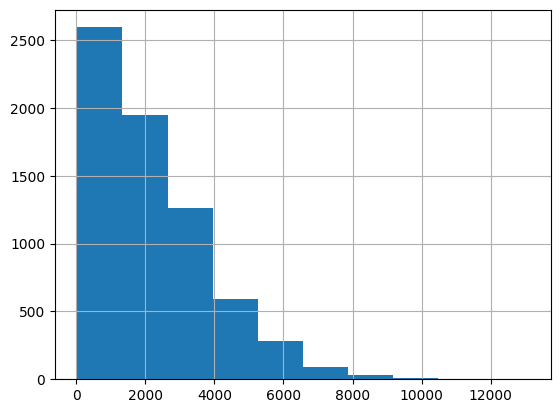

In [ ]:
train['Item_Outlet_Sales'].hist()

In [ ]:
train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1162
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1940
Outlet_Location_Type,0


In [ ]:
test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,301
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,470
Outlet_Location_Type,0


##### 데이터 전처리

In [ ]:
cols = list(train.columns[train.dtypes=='object'])
cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
# target 데이터를 train 데이터에서 분리
target = train.pop('Item_Outlet_Sales')

In [ ]:
print(train.shape, test.shape)
df = pd.concat([train, test])
print(df.shape)

(6818, 11) (1705, 11)
(8523, 11)


In [ ]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
  df[col] = le.fit_transform(df[col])

In [ ]:
train = df.iloc[:len(train)]
test = df.iloc[len(train):]
print(train.shape, test.shape)

(6818, 11) (1705, 11)


In [ ]:
# 결측치는 최솟값과 최빈값으로 채운다
# 가장 편한 값으로 대처하고 모델 성능을 보고 나서 변경해도 됨
# 첫 베이스라인 결과 이후 변경 하는 것 추천

train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].min())
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].min())
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

<ipython-input-223-6a9a25435b3e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].min())
<ipython-input-223-6a9a25435b3e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
<ipython-input-223-6a9a25435b3e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [ ]:
# item_id 제거
# 없애지 않아도 되기에 모델결과 비교
print(train.shape, test.shape)
train.drop('Item_Identifier', axis=1, inplace=True)
test.drop('Item_Identifier', axis=1, inplace=True)
print(train.shape, test.shape)

(6818, 10) (1705, 10)


<ipython-input-225-f33eb05bf990>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('Item_Identifier', axis=1, inplace=True)
<ipython-input-225-f33eb05bf990>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Item_Identifier', axis=1, inplace=True)


In [ ]:
# 검증 데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, target, random_state=0, test_size=0.2)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(5454, 10) (1364, 10) (5454,) (1364,)


##### 모델 학습

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

In [ ]:
# 선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
print("MSE:", mse)

mae = mean_absolute_error(y_val, y_pred)
print('MAE:', mae)

r2 = r2_score(y_val, y_pred)
print('R2:',f1)

rmse = root_mean_squared_error(y_val, y_pred)
print('RMSE:', rmse)

MSE: 1282923.0729833888
MAE: 865.1968401416275
R2: 0.669047619047619
RMSE: 1132.6619411737065


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
print("MSE:", mse)

mae = mean_absolute_error(y_val, y_pred)
print('MAE:', mae)

r2 = r2_score(y_val, y_pred)
print('R2:',f1)

rmse = root_mean_squared_error(y_val, y_pred)
print('RMSE:', rmse)

MSE: 1101802.8117346708
MAE: 747.2971172067448
R2: 0.669047619047619
RMSE: 1049.6679530854844


In [ ]:
# Light GBM
import lightgbm as lgb
model = lgb.LGBMRegressor(ramdom_state=0, verbose=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
print("MSE:", mse)

mae = mean_absolute_error(y_val, y_pred)
print('MAE:', mae)

r2 = r2_score(y_val, y_pred)
print('R2:',f1)

rmse = root_mean_squared_error(y_val, y_pred)
print('RMSE:', rmse)

MSE: 1115654.3482227568
MAE: 736.6367966578568
R2: 0.669047619047619
RMSE: 1056.2454015155554


##### 예측 및 결과 파일 생성

In [ ]:
pred = model.predict(test)
submit = pd.DataFrame({'pred': pred})
submit.to_csv('result.csv', index=False)

In [ ]:
result = pd.read_csv('result.csv')
result

,pred
0,1226.505042
1,830.189210
2,1788.766443
3,1644.510784
4,2831.798098
...,...
1700,285.648607
1701,481.591492
1702,3666.348761
1703,990.651255


### CHAPTER 04 머신런이 실습(다중분류)

##### 데이터 불러오기

In [ ]:
import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/빅데이터분석기사파일/part2/ch5/train.csv")
test = pd.read_csv("/content/drive/MyDrive/빅데이터분석기사파일/part2/ch5/test.csv")

##### EDA

In [ ]:
train.head(3)

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,56.0,16.0,11.0,35.598217,120.0,Yes,229.093478,252.385965,1,Bad,...,15.0,36597.56,8.0,10.0,29.0,5.0,3143.796667,22.49,2963.18,122.900223
1,49.0,23.0,12.0,25.553106,120.0,Yes,104.613906,219.105944,1,Bad,...,28.0,32057.30,9.0,8.0,16.0,7.0,2606.441667,1.40,1327.26,164.859426
2,34.0,20.0,6.0,40.039954,174.0,Yes,338.626965,251.265589,1,Bad,...,46.0,75868.80,6.0,10.0,32.0,7.0,6074.400000,3.60,1432.71,297.547446


In [ ]:
test.head(3)

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Mix,Payment_Behaviour,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,4.0,8.0,2.0,33.444469,239.0,No,104.467859,503.976904,Good,Low_spent_Small_value_payments,54.0,43754.320,5.0,7.0,7.0,1.0,3938.193333,7.55,515.73,35.374569
1,31.0,19.0,14.0,27.762143,93.0,Yes,149.137974,219.372773,Bad,High_spent_Small_value_payments,40.0,18836.230,6.0,8.0,16.0,6.0,1280.685833,14.26,1310.56,49.557837
2,55.0,16.0,17.0,38.985106,179.0,Yes,21.862086,299.525207,Standard,Low_spent_Small_value_payments,27.0,9360.515,8.0,6.0,15.0,5.0,531.042917,11.92,2113.29,21.716999


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delay_from_due_date       10000 non-null  float64
 1   Num_of_Delayed_Payment    10000 non-null  float64
 2   Num_Credit_Inquiries      10000 non-null  float64
 3   Credit_Utilization_Ratio  10000 non-null  float64
 4   Credit_History_Age        10000 non-null  float64
 5   Payment_of_Min_Amount     10000 non-null  object 
 6   Amount_invested_monthly   10000 non-null  float64
 7   Monthly_Balance           10000 non-null  float64
 8   Credit_Score              10000 non-null  int64  
 9   Credit_Mix                10000 non-null  object 
 10  Payment_Behaviour         10000 non-null  object 
 11  Age                       10000 non-null  float64
 12  Annual_Income             10000 non-null  float64
 13  Num_Bank_Accounts         10000 non-null  float64
 14  Num_Cre

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delay_from_due_date       10000 non-null  float64
 1   Num_of_Delayed_Payment    10000 non-null  float64
 2   Num_Credit_Inquiries      10000 non-null  float64
 3   Credit_Utilization_Ratio  10000 non-null  float64
 4   Credit_History_Age        10000 non-null  float64
 5   Payment_of_Min_Amount     10000 non-null  object 
 6   Amount_invested_monthly   10000 non-null  float64
 7   Monthly_Balance           10000 non-null  float64
 8   Credit_Mix                10000 non-null  object 
 9   Payment_Behaviour         10000 non-null  object 
 10  Age                       10000 non-null  float64
 11  Annual_Income             10000 non-null  float64
 12  Num_Bank_Accounts         10000 non-null  float64
 13  Num_Credit_Card           10000 non-null  float64
 14  Interes

In [ ]:
train.describe()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Credit_Score,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,21.263100,13.381300,5.79400,32.306216,220.501400,195.497580,400.130732,1.880700,33.33680,50318.451889,5.382900,5.538000,14.468200,3.525700,4182.906254,10.435633,1428.996096,105.114322
std,14.778976,6.217876,3.86772,5.093599,99.204263,196.150962,211.034108,0.679789,10.73122,38171.440801,2.566271,2.096186,8.687977,2.441585,3175.891720,6.501954,1158.852422,125.502925
min,0.000000,0.000000,0.00000,20.719745,2.000000,0.000000,0.007760,1.000000,14.00000,7006.035000,0.000000,0.000000,1.000000,0.000000,303.645417,0.500000,0.230000,0.000000
25%,10.000000,9.000000,3.00000,28.075839,144.000000,74.056997,268.741936,1.000000,24.00000,19259.307500,4.000000,4.000000,7.000000,2.000000,1626.342083,5.507500,562.340000,28.588769
50%,18.000000,14.000000,6.00000,32.310153,219.000000,130.089440,334.854343,2.000000,33.00000,36875.140000,5.000000,5.000000,13.000000,3.000000,3073.272917,9.410000,1168.235000,65.971478
75%,28.000000,18.000000,8.00000,36.491502,301.000000,234.960725,470.351899,2.000000,42.00000,71507.587500,7.000000,7.000000,20.000000,5.000000,5936.870000,14.630000,1960.420000,144.429302
max,67.000000,28.000000,17.00000,47.103409,404.000000,1674.337665,1567.208309,3.000000,56.00000,179987.280000,10.000000,11.000000,34.000000,9.000000,15167.180000,29.980000,4998.070000,1701.955013


In [ ]:
train.describe(include='O')

,Payment_of_Min_Amount,Credit_Mix,Payment_Behaviour
count,10000,10000,10000
unique,3,3,6
top,Yes,Standard,Low_spent_Small_value_payments
freq,5269,4591,3416


In [ ]:
test.describe()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,21.097900,13.255200,5.752500,32.186729,221.825800,193.117531,400.580605,33.482000,50108.745203,5.340400,5.528100,14.472300,3.544600,4166.494700,10.416235,1416.394165,103.957612
std,14.797811,6.251238,3.865998,5.159005,99.213024,195.419810,212.389930,10.739097,38406.986599,2.586039,2.090609,8.773878,2.426891,3194.843717,6.521728,1148.313667,121.991063
min,0.000000,0.000000,0.000000,20.172942,2.000000,0.000000,1.222495,14.000000,7006.035000,0.000000,0.000000,1.000000,0.000000,303.645417,0.500000,0.340000,0.000000
25%,10.000000,9.000000,3.000000,27.894659,145.000000,72.723155,270.578579,25.000000,19214.681250,3.000000,4.000000,7.000000,2.000000,1616.490417,5.407500,560.410000,29.240525
50%,18.000000,14.000000,5.000000,32.166358,220.000000,128.333887,336.320248,33.000000,36475.525000,5.000000,5.000000,13.000000,3.000000,3052.810833,9.340000,1159.810000,65.377135
75%,28.000000,18.000000,8.000000,36.504712,304.000000,234.830616,465.525296,42.000000,71025.400000,7.000000,7.000000,20.000000,5.000000,5913.288333,14.832500,1941.615000,142.311157
max,67.000000,28.000000,29.000000,50.000000,404.000000,1804.355694,1533.102266,56.000000,179987.280000,10.000000,11.000000,34.000000,9.000000,15204.633333,29.970000,4997.050000,1701.955013


In [ ]:
train['Credit_Score'].value_counts()

,count
Credit_Score,
2,5237
1,2978
3,1785


##### 데이터 전처리

In [ ]:
print(train.shape)
target = train.pop('Credit_Score')
print(train.shape)

(10000, 21)
(10000, 20)


In [ ]:
print(train.shape, test.shape)
df = pd.concat([train,test])
print(df.shape)

(10000, 20) (10000, 20)
(20000, 20)


In [ ]:
cols = list(train.columns[train.dtypes=='object'])
cols

['Payment_of_Min_Amount', 'Credit_Mix', 'Payment_Behaviour']

In [ ]:
# light gbm은 범주형 데이터 타입을 category로 바꾸기만 하면 레이블 인코딩을 할 필요없다
# for col in cols:
#   train[col] = train[col].astype('category')
#   test[col] = test[col].astype('category')

In [ ]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
  df[col] = le.fit_transform(df[col])

print(train.shape, test.shape)
train = df.iloc[:len(train)]
test = df.iloc[len(train):]
print(train.shape, test.shape)

(10000, 20) (10000, 20)
(10000, 20) (10000, 20)


In [ ]:
# 검증 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, target, random_state=0, test_size=0.2)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(8000, 20) (2000, 20) (8000,) (2000,)


##### 모델 학습

In [ ]:
# random forest는 category 자료형을 자동으로 인식하지 못함
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("accuracy:", accuracy)

f1 = f1_score(y_val, y_pred, average='macro')
print("F1:", f1)

accuracy: 0.7125
F1: 0.6942498758802303


In [ ]:
# light gbm
import lightgbm as lgb
model = lgb.LGBMClassifier(ramdom_state=0, verbose=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("accuracy:", accuracy)

f1 = f1_score(y_val, y_pred, average='macro')
print("F1:", f1)

accuracy: 0.704
F1: 0.6840113506152249


##### 예측 및 결과 제출

In [ ]:
pred = model.predict(test)
pred

array([3, 1, 1, ..., 1, 1, 2])

In [ ]:
submit = pd.DataFrame({'pred': pred})
submit.to_csv('result.csv', index=False)

In [ ]:
result = pd.read_csv('result.csv')
result

,pred
0,3
1,1
2,1
3,2
4,1
...,...
9995,2
9996,2
9997,1
9998,1


### CHAPTER 06 이진 분류 연습문제

#### 환자의 당뇨병 여부 예측

In [ ]:
# 베이스라인
import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/빅데이터분석기사파일/part2/ch6/diabetes_train.csv")
test = pd.read_csv("/content/drive/MyDrive/빅데이터분석기사파일/part2/ch6/diabetes_test.csv")

print("================train.head(3)=================================================")
print(train.head(3))

print("================test.head(3)=================================================")
print(test.head(3))

print("================train.info()=================================================")
print(train.info())

print("================test.info()=================================================")
print(test.info())

print("================train.describe()=================================================")
print(train.describe())

print("================test.describe()=================================================")
print(test.describe())

print("================train.isnull().sum()=================================================")
print(train.isnull().sum())

print("================test.isnull().sum()=================================================")
print(test.isnull().sum())

# train 에서 Outcome 분리
target = train.pop('Outcome')

# 검증 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, target, random_state=0, test_size=0.2)
print("======데이터 사이즈========")
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# 모델 학습
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)

# 예측 양성 확률 일부
print('==========예측 양성 확률 일부==========')
print(y_pred[:5,1])

# roc-auc
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_val, y_pred[:,1])
print('ROC_AUC:',roc_auc)

# 예측 및 결과 결과 파일 생성
pred = rf.predict_proba(test)
submit = pd.DataFrame({'pred': pred[:,1]})
submit.to_csv('result.csv', index=False)

# 확인
pd.read_csv('result.csv')

================train.head(3)=================================================
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1      118             58             36       94  33.3   
1            3      173             78             39      185  33.8   
2            4      109             64             44       99  34.8   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.261   23        0  
1                     0.970   31        1  
2                     0.905   26        1  
================test.head(3)=================================================
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            3      102             74              0        0  29.5   
1            5      104             74              0        0  28.8   
2            4       95             70             32        0  32.1   

   DiabetesPedigreeFunction  Age  
0                     0.121   32  
1                  

,pred
0,0.17
1,0.33
2,0.11
3,0.04
4,0.09
...,...
149,0.53
150,0.23
151,0.06
152,0.69


In [ ]:
# 성능 개선
# 방법 1 : 데이터 전치리
# 방법 2 : 하이퍼파라미터튜닝 (max_depth, n_estimators ...)

import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/빅데이터분석기사파일/part2/ch6/diabetes_train.csv")
test = pd.read_csv("/content/drive/MyDrive/빅데이터분석기사파일/part2/ch6/diabetes_test.csv")

# 타겟분리
target = train.pop('Outcome')

# minmaxscaler => ROC-AUC: 0.8031
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

# standardscaler => ROC-AUC: 0.8005
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

# robustscaler => ROC-AUC: 0.7987
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

# 검증 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, target, random_state=0, test_size=0.2)
print("======데이터 사이즈========")
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# 모델학습
# max_depth = 3 / 0.8123
# max_depth = 5 / 0.8156
# max_depth = 7 / 0.8054
# n_estimators = 200 / 0.8216
# n_estimators = 300 / 0.82
# n_estimators = 400 / 0.8219
# n_estimators = 500 / 0.8238
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0, max_depth = 5, n_estimators=500)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)

# ROC-AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_val, y_pred[:,1])
print('ROC-AUC:',roc_auc)

# 예측 및 결과 제출
pred = rf.predict_proba(test)
submit = pd.DataFrame({'pred': pred[:,1]})
submit.to_csv('result.csv', index=False)

# 확인
pd.read_csv('result.csv')

======데이터 사이즈========
(491, 8) (123, 8) (491,) (123,)
ROC-AUC: 0.8238356164383561


,pred
0,0.183228
1,0.254024
2,0.146948
3,0.060268
4,0.075731
...,...
149,0.480828
150,0.243870
151,0.097078
152,0.635758


#### 이직 여부 예측

In [ ]:
# 베이스라인
import pandas as pd

train= pd.read_csv("/content/drive/MyDrive/빅데이터분석기사파일/part2/ch6/hr_train.csv")
test= pd.read_csv("/content/drive/MyDrive/빅데이터분석기사파일/part2/ch6/hr_test.csv")

print("==========train.head(3)==========")
print(train.head(3))

print("==========test.head(3)==========")
print(test.head(3))

print("==========train.info()==========")
print(train.info())

print("==========test.info()==========")
print(test.info())

print("==========train.describe()==========")
print(train.describe())

print("==========train.describe(include='O')==========")
print(train.describe(include='O'))

print("==========train.isnull().sum()==========")
print(train.isnull().sum())

# 타겟 분리
target = train.pop('target')

# 결측치 X로 대체
train = train.fillna('X')
test = test.fillna('X')

# train과 test 합쳐서 원-핫 인코딩
combined = pd.concat([train,test])
combined_dummies = pd.get_dummies(combined)
n_train = len(train)

train = combined_dummies.iloc[:n_train]
test = combined_dummies.iloc[n_train:]
print(train.shape, test.shape)

# 검증 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, target, random_state=0, test_size=0.2)
print("=====print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)=====")
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# 모델 학습 및 평가
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)
roc_auc = roc_auc_score(y_val, y_pred[:,1])
print("ROC-AUC:", roc_auc)

# 예측 및 결과 제출
pred = rf.predict_proba(test)
submit = pd.DataFrame({'pred': pred[:,1]})
submit.to_csv('result.csv', index=False)

# 확인
pd.read_csv('result.csv')

==========train.head(3)==========
   enrollee_id     city  city_development_index gender  \
0        30266  city_84                   0.698   Male   
1        13254  city_16                   0.910   Male   
2        31675  city_21                   0.624   Male   

       relevent_experience enrolled_university education_level  \
0   No relevent experience    Full time course     High School   
1  Has relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course     High School   

  major_discipline experience company_size company_type last_new_job  \
0              NaN          1      100-500      Pvt Ltd        never   
1             STEM         15        50-99      Pvt Ltd            1   
2              NaN          3          NaN          NaN        never   

   training_hours  target  
0              15     0.0  
1               4     0.0  
2              12     0.0  
==========test.head(3)==========
   enrollee_id      city  city_dev

,pred
0,0.23
1,0.50
2,0.61
3,0.07
4,0.02
...,...
3827,0.13
3828,0.19
3829,0.06
3830,0.13


In [ ]:
# 성능 개선

import pandas as pd

train= pd.read_csv("/content/drive/MyDrive/빅데이터분석기사파일/part2/ch6/hr_train.csv")
test= pd.read_csv("/content/drive/MyDrive/빅데이터분석기사파일/part2/ch6/hr_test.csv")

# 타겟 분리
target = train.pop('target')

# 결측치 X로 대체
train = train.fillna('X')
test = test.fillna('X')

# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = pd.concat([train, test])
print(df.shape)
cols = list(df.columns[df.dtypes=='object'])
for col in cols:
  df[col] = le.fit_transform(df[col])

train = df.iloc[:len(train)]
test = df.iloc[len(train):]
print(train.shape, test.shape)


# # minmaxscaler => 0.7749741291715249
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# train = scaler.fit_transform(train)
# test = scaler.transform(test)

# # standardscaler => 0.7749234996090111
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# train = scaler.fit_transform(train)
# test = scaler.transform(test)

# # robustscaler => 0.7750549023464022
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

# 검증 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, target, random_state=0, test_size=0.2)
print("======데이터 사이즈========")
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# 모델학습
# max_depth = 3 / 0.7787502750970449
# max_depth = 5 / 0.7757423523021527
# max_depth = 7 / 0.777061062178956
# n_estimators = 200 / 0.7775676504605241
# n_estimators = 300 / 0.7779302517781805
# n_estimators = 400 / 0.7786373097147887
# n_estimators = 500 / 0.7788090990396188
# n_estimators = 700 / 0.7789484035006391
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=7, n_estimators=700)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)

# ROC-AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_val, y_pred[:,1])
print('ROC-AUC:',roc_auc)

# 예측 및 결과 제출
pred = rf.predict_proba(test)
submit = pd.DataFrame({'pred': pred[:,1]})
submit.to_csv('result.csv', index=False)

# 확인
pd.read_csv('result.csv')

(19158, 13)
(15326, 13) (3832, 13)
======데이터 사이즈========
(12260, 13) (3066, 13) (12260,) (3066,)
ROC-AUC: 0.7789484035006391


,pred
0,0.238571
1,0.505714
2,0.490000
3,0.070000
4,0.082857
...,...
3827,0.145714
3828,0.198571
3829,0.098571
3830,0.170000


### CHAPTER 07 다중 분류 연습문제



###### 신용 등급 예측

In [ ]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/빅데이터분석기사파일/part2/ch7/score_train.csv')
test = pd.read_csv('/content/drive/MyDrive/빅데이터분석기사파일/part2/ch7/score_test.csv')

print('=========train.info()===========')
print(train.info())

print('=========test.info()===========')
print(test.info())

print('===print(train.describe())===')
print(train.describe())

print("===print(train.describe(include='O'))===")
print(train.describe(include='O'))

# 타겟 분리
target = train.pop('Credit_Score')

# 원핫인코딩
df = pd.concat([train, test])
df = pd.get_dummies(df)

# 결합 후 레이블인코딩 => f1: 0.6853
# from sklearn.preprocessing import LabelEncoder
# df = pd.concat([train, test])
# le = LabelEncoder()
# cols = list(train.columns[train.dtypes=='object'])
# for col in cols:
#   df[col] = le.fit_transform(df[col])

train = df.iloc[:len(train)]
test = df.iloc[len(train):]

# 스케일링
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# 0.7004
mscaler = MinMaxScaler() # 0.7006
sscaler = StandardScaler() # 0.7020
rscaler = RobustScaler() # 0.6988

train = sscaler.fit_transform(train)
test = sscaler.fit_transform(test)

# 검증 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, target, random_state=0, test_size=0.2)
print('====shape====')
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# 모델 학습 및 평가
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
f1 = f1_score(y_val, y_pred, average='macro')
print('F1:', f1)

# 예측 및 결과 저장
pred = rf.predict(test)
submit = pd.DataFrame({'pred': pred})
submit.to_csv('result.csv', index=False)

# 확인
pd.read_csv('result.csv')

=========train.info()===========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4198 entries, 0 to 4197
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delay_from_due_date       4198 non-null   float64
 1   Num_of_Delayed_Payment    4198 non-null   float64
 2   Num_Credit_Inquiries      4198 non-null   float64
 3   Credit_Utilization_Ratio  4198 non-null   float64
 4   Credit_History_Age        4198 non-null   float64
 5   Payment_of_Min_Amount     4198 non-null   object 
 6   Amount_invested_monthly   4198 non-null   float64
 7   Monthly_Balance           4198 non-null   float64
 8   Credit_Mix                4198 non-null   object 
 9   Payment_Behaviour         4198 non-null   object 
 10  Age                       4198 non-null   float64
 11  Annual_Income             4198 non-null   float64
 12  Num_Bank_Accounts         4198 non-null   float64
 13  Num_Credit_Card           4198

,pred
0,Poor
1,Good
2,Standard
3,Good
4,Standard
...,...
1494,Standard
1495,Poor
1496,Standard
1497,Good


#### 약물 종류 예측

In [ ]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/빅데이터분석기사파일/part2/ch7/drug_train.csv')
test = pd.read_csv('/content/drive/MyDrive/빅데이터분석기사파일/part2/ch7/drug_test.csv')

print('=train.info()=')
print(train.info())

print('=test.info()=')
print(test.info())

print('=train.describe=')
print(train.describe(include='O'))

print('=value_counts=')
print(train['Drug'].value_counts())

# # 타겟 분리 및 레이블인코딩
# from sklearn.preprocessing import LabelEncoder
# target = train.pop('Drug')
# le = LabelEncoder()
# df = pd.concat([train,test])
# cols = list(df.columns[df.dtypes == 'object'])

# print('==columns_name_object')
# print(cols)

# for col in cols:
#   df[col] = le.fit_transform(df[col])

# train = df.iloc[:len(train)]
# test = df.iloc[len(train):]

# 원핫인코딩
target = train.pop('Drug')
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print('=shape=')
print(train.shape, test.shape)

# 검증 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, target, random_state=0, test_size=0.2)
print(X_train.shape , X_val.shape, y_train.shape, y_val.shape)

# 모델 학습 및 평가
# import lightgbm as lgb
# from sklearn.metrics import f1_score
# from sklearn.model_selection import cross_val_score
# model = lgb.LGBMClassifier(random_state=0, verbose=-1)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_val)
# f1s = cross_val_score(model, train, target, cv=3, scoring='f1_macro')
# print('F1:', f1s.mean())

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(random_state=0, n_estimators=500, max_depth=3)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
f1 = cross_val_score(rf, train, target, cv=3, scoring='f1_macro')
print('F1_macro:', f1.mean())

# 예측 및 결과 저장
pred = rf.predict(test)
submit = pd.DataFrame({'pred': pred})
submit.to_csv('result.csv', index=False)

# 확인
pd.read_csv('result.csv')

=train.info()=
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          100 non-null    int64  
 1   Sex          100 non-null    object 
 2   BP           100 non-null    object 
 3   Cholesterol  100 non-null    object 
 4   Na_to_K      100 non-null    float64
 5   Drug         100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB
None
=test.info()=
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          100 non-null    int64  
 1   Sex          100 non-null    object 
 2   BP           100 non-null    object 
 3   Cholesterol  100 non-null    object 
 4   Na_to_K      100 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.0+ KB
None
=

,pred
0,DrugY
1,DrugY
2,DrugY
3,DrugY
4,drugB
...,...
95,drugX
96,drugX
97,DrugY
98,DrugY


#### 유리 종류 예측

In [ ]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/빅데이터분석기사파일/part2/ch7/glass_train.csv')
test = pd.read_csv('/content/drive/MyDrive/빅데이터분석기사파일/part2/ch7/glass_test.csv')

print('==train.info==')
print(train.info())

print('==test.info==')
print(test.info())

print('=train.describe=')
print(train.describe())

print('=value_counts=')
print(train['Type'].value_counts())

# 원핫인코딩 / 0.6119801766860591
target = train.pop('Type')
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# 스케일링 / 0.6119801766860591
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()
# train = mms.fit_transform(train)
# test = mms.fit_transform(test)

# 검증 데이터 분리
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, target, random_state=0, test_size=0.2)
print('=data.shape=')
print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape)

# max_depth=5 / 0.6410714285714286
# max_depth=7 / 0.6119801766860591
# max_depth=5, n_estimators=200 / 0.6507936507936507
# max_depth=5, n_estimators=500 / 0.6507936507936507
# 모델 학습 및 평가
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
rf = RandomForestClassifier(random_state=0, max_depth=5, n_estimators=500)
rf.fit(X_tr, y_tr)
y_pred = rf.predict(X_val)
f1w = f1_score(y_val, y_pred, average='weighted')
print('F1_weighted:', f1w)

# 예측 및 결과 저장
pred = rf.predict(test)
submit = pd.DataFrame({'pred': pred})
print('==submit==')
print(submit)
submit.to_csv('result.csv', index=False)

# 확인
pd.read_csv('result.csv')

==train.info==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      149 non-null    float64
 1   Na      149 non-null    float64
 2   Mg      149 non-null    float64
 3   Al      149 non-null    float64
 4   Si      149 non-null    float64
 5   K       149 non-null    float64
 6   Ca      149 non-null    float64
 7   Ba      149 non-null    float64
 8   Fe      149 non-null    float64
 9   Type    149 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 11.8 KB
None
==test.info==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      65 non-null     float64
 1   Na      65 non-null     float64
 2   Mg      65 non-null     float64
 3   Al      65 non-null     float64
 4   Si      65 non-null     float64
 5   

,pred
0,1
1,5
2,5
3,2
4,2
...,...
60,1
61,1
62,2
63,1


### CHAPTER 08 회귀 연습문제

#### 항공권 가격 예측

In [ ]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/빅데이터분석기사파일/part2/ch8/flight_train.csv')
test = pd.read_csv('/content/drive/MyDrive/빅데이터분석기사파일/part2/ch8/flight_test.csv')

print('=train.info=')
print(train.info())

print('=test.info=')
print(test.info())

print('=train.describe=')
print(train.describe())

print('=train.describe(O)=')
print(train.describe(include='O'))

# 타겟 분리
target = train.pop('price')

# flight 컬럼의 일부 데이터 숫자만 추출
train['flight'] = train['flight'].str.split('-').str[1].astype(int)
test['flight'] = test['flight'].str.split('-').str[1].astype(int)

# # 라벨인코딩
# from sklearn.preprocessing import LabelEncoder
# df = pd.concat([train, test])
# cols = list(df.columns[df.dtypes=='object'])
# print('df_object_columns')
# print(cols)
# le = LabelEncoder()
# for col in cols:
#   df[col] = le.fit_transform(df[col])

# print('=df.info=')
# print(df.info())
# train = df.iloc[:len(train)]
# test = df.iloc[len(train):]

# 원핫인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print('data_shape')
print(train.shape, test.shape)

# 스케일링
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

mscaler = MinMaxScaler()
sscaler = StandardScaler()
rscaler = RobustScaler()

train = sscaler.fit_transform(train)
test = sscaler.fit_transform(test)

# 검증 데이터 분할
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, target, random_state=0, test_size=0.2)
print('=split_shape=')
print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape)

# 모델 학습 및 평가(RMSE)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
rf = RandomForestRegressor(random_state=0, max_depth=20, n_estimators=500)
rf.fit(X_tr, y_tr)
y_pred = rf.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
print('RMSE:', rmse)

# 예측 및 결과 제출
pred = rf.predict(test)
submit = pd.DataFrame({'pred': pred})
submit.to_csv('result.csv', index=False)

# 확인
pd.read_csv('result.csv')

=train.info=
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           10505 non-null  object 
 1   flight            10505 non-null  object 
 2   source_city       10505 non-null  object 
 3   departure_time    10505 non-null  object 
 4   stops             10505 non-null  object 
 5   arrival_time      10505 non-null  object 
 6   destination_city  10505 non-null  object 
 7   class             10505 non-null  object 
 8   duration          10505 non-null  float64
 9   days_left         10505 non-null  int64  
 10  price             10505 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 902.9+ KB
None
=test.info=
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4502 entries, 0 to 4501
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            ---------

,pred
0,56715.721786
1,5250.340554
2,12390.489011
3,5958.418964
4,4959.778888
...,...
4497,15938.797996
4498,4390.291905
4499,25190.392000
4500,17051.143657


#### 노트북 가격 예측

In [ ]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/빅데이터분석기사파일/part2/ch8/laptop_train.csv')
test = pd.read_csv('/content/drive/MyDrive/빅데이터분석기사파일/part2/ch8/laptop_test.csv')

print('==train.info()==')
print(train.info())

print('==test.info()==')
print(test.info())

print('==train.describe(o)==')
print(train.describe(include='object'))

# 타겟 분리
target = train.pop('Price')

# 결측치가 많은 series와 brand 정보가 담긴 model을 제거
train.drop(['Series','Model'], axis=1, inplace=True)
test.drop(['Series','Model'], axis=1, inplace=True)

# 범주형 데이터 결측치 X로 대체
cols = list(train.columns[train.dtypes=='object'])
train[cols] = train[cols].fillna('X')
test[cols] = test[cols].fillna('X')

# 수치형 데이터 결측치 -1로 대체
train['RAM'] = train['RAM'].fillna(-1)
test['RAM'] = train['RAM'].fillna(-1)

# 원핫인코딩
df = pd.concat([train,test])
df = pd.get_dummies(df)
train = df.iloc[:len(train)]
test = df.iloc[len(train):]
print('==shape==')
print(train.shape, test.shape)

# 검증 데이터 분리
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, target, random_state=0, test_size=0.2)

# 모델학습 및 평가(결정계수)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(random_state=0)
rf.fit(X_tr, y_tr)
y_pred = rf.predict(X_val)
r2 = r2_score(y_val, y_pred)
print("R2:", r2)

# 예측 및 저장
pred = rf.predict(test)
submit = pd.DataFrame({'pred': pred})
submit.to_csv('result.csv', index=False)

# 확인
pd.read_csv('result.csv')

==train.info()==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               91 non-null     object 
 1   Model               82 non-null     object 
 2   Series              55 non-null     object 
 3   Processor           86 non-null     object 
 4   Processor_Gen       86 non-null     object 
 5   RAM                 85 non-null     float64
 6   Hard_Disk_Capacity  85 non-null     object 
 7   OS                  85 non-null     object 
 8   Rating              91 non-null     float64
 9   Price               91 non-null     int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 7.2+ KB
None
==test.info()==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Bran

,pred
0,40383.64
1,40424.75
2,65105.60
3,39960.00
4,52031.29
5,60115.80
6,64301.04
7,66852.33
8,72739.82
9,36983.46


#### 중고차 가격 예측

In [ ]:
import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/빅데이터분석기사파일/part2/ch8/car_train.csv")
test = pd.read_csv("/content/drive/MyDrive/빅데이터분석기사파일/part2/ch8/car_test.csv")

print('=train.info=')
print(train.info())

print('=test.info=')
print(test.info())

print('=train,describe=')
print(train.describe())

print('=train.describe(O)=')
print(train.describe(include='O'))

# 타겟 분리
target = train.pop('Price')

# Mileage 의 km제거
train['Mileage'] = train['Mileage'].str.split().str[0].astype(int)
test['Mileage'] = test['Mileage'].str.split().str[0].astype(int)

# Engine volume에서 turbo 새로운 컬럼으로 분리
train['turbo'] = train['Engine volume'].str.contains('turbo').astype(int)
test['turbo'] = test['Engine volume'].str.contains('turbo').astype(int)

train['Engine volume'] = train['Engine volume'].str.replace('Turbo','').astype(float)
test['Engine volume'] = test['Engine volume'].str.replace('Turbo','').astype(float)

# 레이블인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = pd.concat([train,test])
cols = list(df.columns[df.dtypes=='object'])
for col in cols:
  df[col] = le.fit_transform(df[col])

train = df.iloc[:len(train)]
test = df.iloc[len(train):]
print('=shape=')
print(train.shape, test.shape)

# 검증 데이터 분할
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, target, random_state=0, test_size=0.2)

# 모델 학습 및 검증(RMSLE)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_log_error
rf = RandomForestRegressor(random_state=0, n_estimators=200)
rf.fit(X_tr, y_tr)
y_pred = rf.predict(X_val)
rmsle = root_mean_squared_log_error(y_val, y_pred)
print('RMSLE:', rmsle)

# 예측 및 저장
pred = rf.predict(test)
submit = pd.DataFrame({'pred': pred})
submit.to_csv('result.csv', index=False)

# 확인
pd.read_csv('result.csv')

=train.info=
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6732 entries, 0 to 6731
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             6732 non-null   int64  
 1   Levy              6732 non-null   object 
 2   Manufacturer      6732 non-null   object 
 3   Model             6732 non-null   object 
 4   Prod. year        6732 non-null   int64  
 5   Category          6732 non-null   object 
 6   Leather interior  6732 non-null   object 
 7   Fuel type         6732 non-null   object 
 8   Engine volume     6732 non-null   object 
 9   Mileage           6732 non-null   object 
 10  Cylinders         6732 non-null   float64
 11  Gear box type     6732 non-null   object 
 12  Drive wheels      6732 non-null   object 
 13  Doors             6732 non-null   object 
 14  Wheel             6732 non-null   object 
 15  Color             6732 non-null   object 
 16  Airbags           6732 non-nu

,pred
0,39849.165
1,10338.645
2,15816.120
3,81229.685
4,47772.100
...,...
5767,8151.500
5768,9222.395
5769,10820.885
5770,26299.825
